# COGS 108 - Final Project 

# Overview

The purpose of this project is to determine if positively rated restaurants on Yelp have higher health inspection scores than negatively rated restaurants in Raleigh, North Carolina. The results that were shown determined that there is some statistically significant relationship between health inspection scores and Yelp ratings and the average health inspection score for restaurants with above 3 stars was higher compared to that of restaurants with below 3 stars. This demonstrates that it is possible that there is some correlation between cleanliness of restaurants and Yelp ratings for restaurants in Raleigh, NC.

# Name & PID

- Name: Megan Kwok
- PID: A13739342

# Research Question

Do restaurants with positive Yelp reviews (above 3 stars) have higher health inspection scores than restaurants with negative reviews (below 3 stars) in Raleigh, NC?

## Background and Prior Work

In 2013, Yelp launched its Local Inspector Value Entry Specification (LIVES) program, which includes a feature where health inspection ratings are displayed publicly on restaurants’ pages (Bassig). This data is displayed as a score out of 100 and is obtained from HDScores, which is a nationwide database for health inspection ratings (Bassig).  HDScores contains ratings that cover most of the nation’s population across 42 states and for businesses that do not have a rating with a local health department, the ratings are calculated from a business’s previous health ratings (Bassig). In addition to displaying health inspection scores, Yelp has decided this year to alert customers if a restaurant has a health rating below a C rating or worse by showing warning on the restaurant’s page (Grover). Although there have been some errors in health inspection ratings reported on Yelp pages, the company claims that in Los Angeles, they receive updated health scores every week from local health departments (Grover).

When Yelp decided to display health inspection scores on restaurant’s pages, a restaurant in San Francisco that had fixed their hygiene issues but continued to have the original score on their page, showed an increase in negative reviews and a 15 percent drop in business during this time (Adams). Furthermore, another study by Weijia (Daisy) Dai and Michael Luca, demonstrates that when health scores began to be displayed on Yelp in San Francisco, low-scoring restaurants in regards to health inspection ratings ended up with lower Yelp ratings compared to restaurants with higher health ratings (Dai 8). In this study, Dai and Luca also found that there was a “7% decrease in purchase intentions for restaurants with low scores due to hygiene alerts, and [an] 11% decrease in the number of reviews” after Yelp implemented the health inspection rating feature in 2013 (Dai 2).


References (include links):
- 1) Adams, Erika - “Yelp Adds Health Code Ratings to Restaurant Pages Nationwide”
(https://table.skift.com/2018/07/24/yelp-adds-health-code-ratings-to-restaurant-pages-nationwide/)
- 2) Bassig, Migs - “Yelp Health Score: What Your Business Needs to Know”
(https://www.reviewtrackers.com/blog/yelp-health-score/)
- 3) Dai, Weijia, Michael Luca - “Digitizing Disclosure: The Case of Restaurant Hygiene Scores
(https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3131900)
(link to pdf was too long so click on download pdf in the above link for article)
- 4) Grover, Joel, Amy Goral - “Yelp Warns Consumers About LA Restaurants With Bad Grades
(https://www.nbclosangeles.com/investigations/yelp-warns-consumers-about-la-restaurants-with-bad-grades/2296465/)

# Hypothesis


In Raleigh, NC, if there are restaurants that have above 3 stars on Yelp, then they will have higher health inspection scores than restaurants that are rated below 3 stars on Yelp. I hypothesize this correlation because in the restaurant industry, health and hygiene are valued greatly because consumers that dine at these restaurants usually prefer the environment and food to be cleanly. Therefore, restaurants that are seen as having lower health inspection scores may be viewed as less desirable for potential customers on Yelp.

# Dataset(s)

The data that will be used to answer the research question will be data that contains information about restaurants in Raleigh, North Carolina, their associated Yelp ratings, any healthcode violations these restaurants have had between 2012 to 2016, and the health inspection scores the restaurants have received. These data files are in .csv format and used to create DataFrames that will be cleaned and used for later analysis.

Source: Link to access all data files
https://canvas.ucsd.edu/courses/12630/modules/items/362378

Restaurants in North Carolina
Filename: 'restaurants.csv'
Number of Observations: 3000

Description: The dataset provides information about restaurants in North Carolina, however, the data that has been taken seems to have a range of restaurants that have opened up from the early 1990s until 2016, so there will not be any recently opened restaurants past 2016 in this dataset. The document also contains a variety of facilities that are not only labelled as restaurants, such as food stands, meat markets, and public school lunchrooms.

This dataset includes features from restaurants in North Carolina with each restaurant's:
- objectid
- hsisid
- name
- address 
- city
- state
- postal code
- phone number
-  open date
- facililty type

For the fields objectid and hsisid, these are unique to each restaurant and used to identify corresponding restaurants in other data files, such as violations.csv and inspections.csv.


Health Inspection Scores
Filename: 'inspections.csv'
Number of Observations: 18467

Description: This dataset provides information about health inspections for a variety of restaurants in North Carolina from the years 2012 to 2016. The restaurants featured in this document are places that have opened between the early 1990s to 2016.

The dataset contains these specific features of restaurants in North Carolina:
- hsisid
- date of inspection
- name of restaurant
- address
- city
- state
- postal code
- phone number
- restaurant open date
- days of inspection from open date
- facility type
- zip code
- description written from health inspection
- health inspector's name
- health inspection score
- number of critical health violations
- number of non-critical health violations
- number of previous critical health violations
- number of previous non-critical health violations
- average number of critical violations in neighboring restaurants
- average number of non-critical violations in neighboring restaurants
- top_match and second_match hsisid
- critical number


Yelp Ratings and Reviews
Filename: 'yelp.csv'

Description: This dataset includes information that can be found on Yelp for restaurants in North Carolina. The date that the data was collected in the document is not provided, so we cannot assume if it is the most recently updated list of Yelp statistics and information about restaurants in North Carolina. Also, we cannot assume that recently opened restaurants are featured in this document.

The dataset contains the following features of restaurants in North Carolina:
- name of the restaurant
- if the restaurant is closed (true if closed, false if not closed)
- Yelp rating (out of 5 stars)
- number of Yelp reviews
- the restaurant's address
- zip code
- latitude and longitude values
- price range (ranges from least expensive to most expensive)
- phone number of restaurant
- the types of food the restaurants serve (true if they serve it, false if otherwise)

How the Datasets Will Be Combined
The datasets will be combined by merging information from the restaurants and Yelp files to ensure we only observe data from restaurants that have an associated Yelp review. Then, we will merge this information with the information from the inspections dataset in order to ensure we have an associated health inspection score for each restaurant.


# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

In [2]:
# Display 7 rows and 8 columns max
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals to 2 places when displaying DataFrames
pd.set_option('precision', 2)


# Data Cleaning

Create DataFrames from restaurants.csv, inspections.csv, yelp.csv, zipcodes.csv files.

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
df_restaurants = pd.read_csv('restaurants.csv')
df_inspections = pd.read_csv('inspections.csv')
df_yelp = pd.read_csv('yelp.csv')
#df_violations = pd.read_csv('violations.csv', dtype={'inspectdate':str})

Drop any rows that have null data for specified columns.

In [4]:
df_restaurants = df_restaurants.dropna(subset = ['hsisid', 'name', 'address1', 'city', 'postalcode', 'facilitytype'])
df_inspections = df_inspections.dropna(subset = ['hsisid', 'name', 'address1', 'city', 'state', 'facilitytype','zip', 'score', 'num_critical'])
df_yelp = df_yelp.dropna(subset = ['name', 'rating', 'review_count', 'address1', 'zip_code'])
#df_violations = df_violations.dropna(subset = ['hsisid', 'inspectdate', 'critical'])

Remove irrelevant columns from the existing DataFrames.

In [5]:
df_restaurants = pd.DataFrame(df_restaurants, columns=['hsisid', 'name', 'address1', 'city', 'postalcode', 'facilitytype'])
df_inspections = pd.DataFrame(df_inspections, columns=['hsisid', 'name', 'address1', 'city', 'facilitytype', 'zip', 'score', 'num_critical'])
df_yelp = pd.DataFrame(df_yelp, columns=['name', 'rating', 'review_count', 'address1', 'zip_code'])

Since we are only interested in restaurants in Raleigh, NC, we are going to remove any rows from df_restaurants and df_inspections that are not in Raleigh, NC.

In [6]:
df_restaurants = df_restaurants[df_restaurants['city'].str.lower() == 'raleigh']
df_inspections = df_inspections[df_inspections['city'].str.lower() == 'raleigh']

Before we find matching restaurants in df_inspections and df_yelp,
we are going to filter df_inspections by eliminating all row entries that are not considered 'restaurants' (e.g. do not have 'Restaurant' as the facility type).

In [7]:
df_inspections = df_inspections[df_inspections['facilitytype'] == 'Restaurant']

We are now going to filter df_yelp by eliminating rows that have ratings of
3 stars because we will be standardizing negative reviews as being below 3 stars and positive reviews as being above 3 stars.

In [8]:
df_yelp = df_yelp[df_yelp['rating'] != 3]


Now we are going to standardize the yelp ratings so that ratings that have
more than 3 stars are labelled as +1 and ratings that have less than
3 stars are labelled as -1 reviews.

In [9]:
def standardize_rating(rating):
    #rating = float(rating)
    if rating < 3:
        return -1
    elif rating > 3:
        return 1
    else:
        return 0

Applying the standardize_rating function above to df_yelp will convert all
rows that have ratings > 3 stars to 1 and rows that have ratings
< 3 stars to -1.

In [10]:
df_yelp['rating'] = df_yelp['rating'].apply(standardize_rating)


We can take a look at the standardized df_yelp below:

In [11]:
df_yelp

,name,rating,review_count,address1,zip_code
0,42nd street oyster bar - rdu airport,-1,23,2400 John Brantley Blvd,27560
1,aldi foods,1,17,2303 NW Maynard Rd,27519
2,luciano pizzeria ristorante,1,2,Crabtree Valley Mall,27612
...,...,...,...,...,...
3685,"sky zone trampoline park, durham",1,12,1720 Guess Rd,27701
3686,highgrove estate,1,4,1613 S Main St,27526
3687,banfield pet hospital,-1,5,6300 Creedmoor Rd,27612


Standardizing addresses by making sure they are all lower case and have the same abbreviations.

In [12]:
def standardize_address(string):
    address = str(string)
    address = address.lower().strip()
    
    address = address.replace('boulevard', 'blv')
    address = address.replace('blvd', 'blv')
    address = address.replace('street', 'st')
    address = address.replace('lane', 'ln')
    address = address.replace('road', 'rd')
    address = address.replace('pkwy', 'pky')
    address = address.replace('parkway', 'pky')
    address = address.replace('place', 'pl')
    address = address.replace('avenue', 'ave')
    address = address.replace('circle', 'cir')
    address = address.replace('road', 'rd')
    address = address.replace('lane', 'ln')
    address = address.replace('highway', 'hwy')
    address = address.replace('drive', 'dr')
    address = address.replace('trail', 'trl')

    return address

In [13]:
df_restaurants['address1'] = df_restaurants['address1'].apply(standardize_address)
df_yelp['address1'] = df_yelp['address1'].apply(standardize_address)
df_inspections['address1'] = df_inspections['address1'].apply(standardize_address)

Let's look at the standardized addresses in df_restaurants, df_yelp, and df_inspections below:

In [14]:
df_restaurants

,hsisid,name,address1,city,postalcode,facilitytype
0,4092017230,SPRING CAFE 2,2900-104 spring forest rd,RALEIGH,27616-1895,Restaurant
3,4092015333,THE REMEDY DINER,137 e hargett st,RALEIGH,27601,Restaurant
5,4092110477,CHARLES BUGG CAFETERIA,825 cooper st,RALEIGH,27610,Public School Lunchrooms
...,...,...,...,...,...,...
3314,4092016368,Golden Palace,4420 capital blv,RALEIGH,27604,Restaurant
3316,4092015461,Zoes Kitchen,1028 oberlin rd,RALEIGH,27605,Restaurant
3320,4092016663,BOJANGLES #5,3301 s wilmington st,RALEIGH,27603,Restaurant


In [15]:
df_yelp

,name,rating,review_count,address1,zip_code
0,42nd street oyster bar - rdu airport,-1,23,2400 john brantley blv,27560
1,aldi foods,1,17,2303 nw maynard rd,27519
2,luciano pizzeria ristorante,1,2,crabtree valley mall,27612
...,...,...,...,...,...
3685,"sky zone trampoline park, durham",1,12,1720 guess rd,27701
3686,highgrove estate,1,4,1613 s main st,27526
3687,banfield pet hospital,-1,5,6300 creedmoor rd,27612


In [16]:
df_inspections

,hsisid,name,address1,city,facilitytype,zip,score,num_critical
0,4092013748,Cafe 3000 At Wake Med,3000 new bern ave,raleigh,Restaurant,27610,96.0,9
1,4092014046,Overtime Sports Pub,1030-149 n rogers ln,raleigh,Restaurant,27610,98.0,0
2,4092015191,TASTE OF CHINA,6209 rock quarry rd,raleigh,Restaurant,27610,97.0,4
...,...,...,...,...,...,...,...,...
18453,4092015590,ARCHIBALD`S TAVERN,5160 sunset lake rd,raleigh,Restaurant,27539,93.5,2
18454,4092016479,THE OVAL,1910 entreprenuur,raleigh,Restaurant,27695,97.0,3
18456,4092016949,TAVERNA AGORA,326 hillsborough st,raleigh,Restaurant,27603,96.0,3


We are filtering Yelp reviews by only considering restaurants with review counts over 10, as there are many outliers that have only a few reviews which would skew the data.

In [17]:
df_yelp = df_yelp[df_yelp['review_count'] > 10]

Merge df_restaurants and df_yelp to match the associated restaurant with the corresponding yelp rating according to matching their addresses.

In [18]:
df_merged = pd.merge(df_restaurants, df_yelp, on='address1', how='inner')
df_merged

,hsisid,name_x,address1,city,...,name_y,rating,review_count,zip_code
0,4092015333,THE REMEDY DINER,137 e hargett st,RALEIGH,...,the remedy diner,1,347,27601
1,4092016679,BITTERSWEET,16 e martin st,RALEIGH,...,bittersweet,1,150,27601
2,4092014493,Chick-fil-A #1573,8901 brier creek pky,RALEIGH,...,chick-fil-a,1,20,27617
...,...,...,...,...,...,...,...,...,...
1105,4092014534,Raleigh Times Bar,14 e hargett st,RALEIGH,...,raleigh times bar,1,481,27601
1106,4092016693,HONEY BAKED HAM COMPANY #103,5275 six forks rd,RALEIGH,...,honeybaked ham,1,11,27609
1107,4092016368,Golden Palace,4420 capital blv,RALEIGH,...,golden palace,1,48,27604


We are going to group the rows by hsisid values and average the 
health inspection scores for each unique restaurant.

In [19]:
df_inspections = df_inspections.groupby('hsisid')['score'].mean().reset_index()

In [20]:
df_inspections

,hsisid,score
0,4092010018,94.33
1,4092010024,94.77
2,4092010031,94.38
...,...,...
1109,4092017331,94.00
1110,4092017340,97.00
1111,4092017445,96.00


Merge df_inspections with df_merged by hsisid.

In [21]:
df = pd.merge(df_merged, df_inspections, on='hsisid', how='inner')

In [22]:
df

,hsisid,name_x,address1,city,...,rating,review_count,zip_code,score
0,4092015333,THE REMEDY DINER,137 e hargett st,RALEIGH,...,1,347,27601,94.00
1,4092016679,BITTERSWEET,16 e martin st,RALEIGH,...,1,150,27601,99.40
2,4092014493,Chick-fil-A #1573,8901 brier creek pky,RALEIGH,...,1,20,27617,96.58
...,...,...,...,...,...,...,...,...,...
792,4092014534,Raleigh Times Bar,14 e hargett st,RALEIGH,...,1,481,27601,93.57
793,4092016693,HONEY BAKED HAM COMPANY #103,5275 six forks rd,RALEIGH,...,1,11,27609,97.67
794,4092016368,Golden Palace,4420 capital blv,RALEIGH,...,1,48,27604,90.00


This ensures that all numerical values in df are integers or floats.

In [23]:
cols = ['rating', 'review_count', 'score']
df = pd.DataFrame(df, columns=cols)
df['rating'] = df['rating'].astype(np.int64)
df['review_count'] = df['review_count'].astype(np.int64)
df['score'] = df['score'].astype(np.float)

# Data Analysis & Results

The scatter plot below shows the average health inspection score on the x axis and associated Yelp rating (positive = 1, negative = -1) on the y axis. This demonstrates if most positively reviewed restaurants are associated with higher health scores and if most negatively reviewed restaurants are associated with lower health scores. The clusters of points indicate that there is little to no correlation with Yelp rating and health inspection scores.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


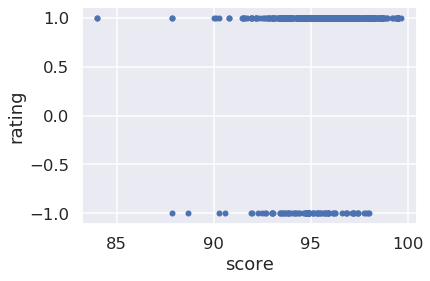

In [24]:
## YOUR CODE HERE
df_simplified = df[['rating', 'score']]
df_simplified.plot.scatter(x ='score', y = 'rating')

This bar plot shows how many restaurants have positive reviews as opposed to those with negative reviews from df. This demonstrates that the number of restaurants with above 3 stars on Yelp is highly skewed compared to the amount of restaurants with below 3 stars, which will skew our results in terms of comparing positively and negatively rated restaurants and their health scores later on.

Text(0, 0.5, 'Count')

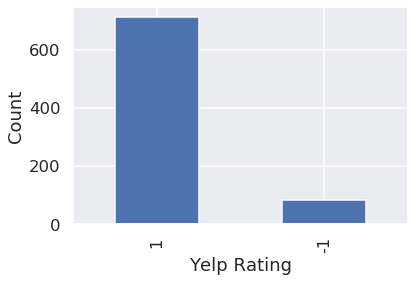

In [25]:
plot = df['rating'].value_counts().plot.bar()
plot.set_xlabel('Yelp Rating')
plot.set_ylabel('Count')

The average number of reviews for restaurants with ratings of more than 3 stars on Yelp.

In [26]:
df[df['rating'] == 1]['review_count'].mean()

88.22752808988764

The average number of reviews for restaurants with ratings of less than 3 stars on Yelp.

In [27]:
df[df['rating'] == -1]['review_count'].mean()

26.686746987951807

This histogram plots the health inspection score distribution among restaurants with below 3 stars on Yelp.

Text(0.5, 0, 'Health Inspection Score')

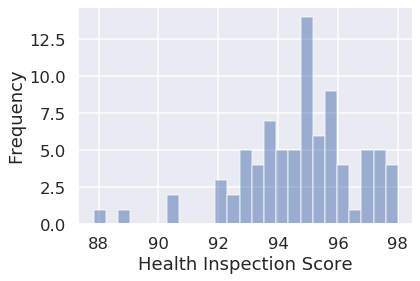

In [28]:
plot = df[df['rating'] == -1]['score'].plot.hist(bins=25, alpha=0.5)
plot.set_xlabel('Health Inspection Score')

This histogram plots the health inspection score distribution among restaurants with above 3 stars on Yelp.

Text(0.5, 0, 'Health Inspection Score')

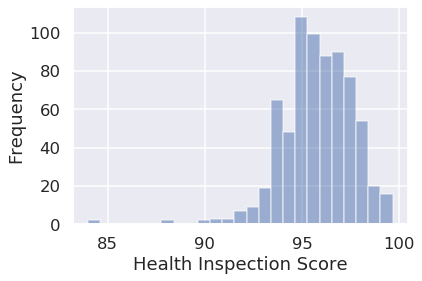

In [29]:
plot = df[df['rating'] == 1]['score'].plot.hist(bins=25, alpha=0.5)
plot.set_xlabel('Health Inspection Score')

As we can see, the range of health inspection scores for negatively rated restaurants on Yelp actually has a smaller range than those that are positively rated on Yelp.

The maximum health score for positively rated restaurants on Yelp.

In [30]:
df[df['rating'] == 1]['score'].max()

99.66666666666667

The maximum health score for negatively rated restaurants on Yelp.

In [31]:
df[df['rating'] == -1]['score'].max()

98.0

The minimum health score for positively rated restaurants on Yelp.

In [32]:
df[df['rating'] == 1]['score'].min()

84.0

The maximum health score for negatively rated restaurants on Yelp.

In [33]:
df[df['rating'] == -1]['score'].min()

87.83333333333333

Save the health scores data for positively and negatively reviewed restaurants on Yelp.

In [34]:
h_pos = df[df['rating'] == 1]['score'].values
h_neg = df[df['rating'] == -1]['score'].values

The average health score for positively reviewed and negatively reviewed restaurants on Yelp.

In [35]:
avg_h_pos = h_pos.mean()
avg_h_neg = h_neg.mean()

In [36]:
print('Average health inspection score of positively rated restaurants on Yelp is \t\t {:2.2f}'.format(avg_h_pos))
print('Average health inspection score of negatively rated restaurants on Yelp is \t\t {:2.2f}'.format(avg_h_neg))

Average health inspection score of positively rated restaurants on Yelp is 		 95.77
Average health inspection score of negatively rated restaurants on Yelp is 		 94.76


Based on the differences between the average health inspection scores above, there may be a difference between the scores of positively and negatively rated restaurants on Yelp, so we will explore further by using a t-test.

In [37]:
t_val = ttest_ind(h_pos, h_neg)[0]
p_val = ttest_ind(h_pos, h_neg)[1]

In [38]:
p_val

2.9313682468508524e-06

In [39]:
# Check if statistical test passes significance, using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')

Data Science accomplished, there is a significant difference!


The approach used to determing if there was a significant difference between the health inspection scores of positively and negatively rated restaurants on Yelp was utilizing a t-test. This approach was used because the histogram plots of health inspection scores demonstrated that negatively rated restaurants showed a distribution that seemed to have mostly high scores that were above 90. In order to discern if there was actually a statistically significant difference between the average health scores of restaurants that have above 3 stars on Yelp and those that have below 3 stars.

The results indicated that there was a significant difference between the average health inspection scores among the restaurants with positive and negative Yelp reviews in Raleigh, North Carolina. This demonstrates that health inspection scores do have some effect on Yelp ratings.

# Ethics & Privacy

In terms of issues with the data collected in the project, one issue occurs in the Raleigh, where there may be biases for the restaurants that are rated higher than the other restaurants in the area, as one type of food may be more popular in this area, so more competition encourages restaurants to strive for higher Yelp ratings. Also, there may be biases for certain restaurants due to the specific demographic in particular areas of Raleigh, so more restaurants that serve a specific type of cuisine may be chosen among others. Other issues with data analysis may occur due to the fact that Yelp ratings are not written solely based on the health inspection rating of a restaurant, as ratings are based on multiple factors, such as quality of food, convenience, or customer service. These other factors could affect a restaurant’s Yelp rating positively or negatively, which could present anomalies in the data collected.

In order to resolve these issues with data collection, the process is refined so that all restaurants in the data files are considered in the analysis, regardless of the types of cuisines offered in Raleigh. Furthermore, the other confounding factors that affect Yelp ratings are mitigated by using the average or mean of Yelp ratings for each restaurant provided in the data files rather than specific ratings in order to consider a restaurant’s rating overall. Furthermore, since all data provided in the project was publicly accessible, there were no issues in violating the privacy of individuals. In order to prevent sensitive data, such as phone numbers, from being released, the sensitive information of restaurants were omitted from all tables and graphs in this project.

# Conclusion & Discussion

For this project, the question being studied is if restaurants rated above 3 stars on Yelp have higher health inspection scores than those of restaurants that are rate below 3 stars in Raleigh, North Carolina. The project demonstrated that by analyzing the difference between the health inspection scores of restaurants that have above three stars on Yelp and below three stars on Yelp, we can conclude that there is some effect of health inspection scores on Yelp ratings. The results concluded that the average health inspection score of restaurants that have more than 3 stars on Yelp is higher than that of restaurants that have below 3 stars on Yelp in Raleigh.

The analysis done in this project utilized the t-test in order to determine if there was a statistically significant difference between the average health inpsection scores of positively and negatively reviewed restaurants on Yelp. By observing that the p-value was less than 0.01, there was a significant difference that was determined. This shows that health inspection scores of restaurants in Raleigh does effect how people rate these restaurants on Yelp, as cleanliness is one of the factors that customers may consider when dining at restaurants.

Although there was a difference detected between average health inspection scores for positively and negatively rated Yelp reviews, there were limitations that may cause discrepancies in the data that was analyzed. Due to the omitting of 3 star ratings for the Yelp data that was considered, there are some restaurants that may have contributed to either the positively or negatively reviewed restaurants' data. This possibly would have caused the difference between the two groups of restaurants to have a similar or different outcomes than the results of the current analysis. Furthermore, there may have been limitations due to restaurants that have different listed addresses between data files or addresses that have differing formats, which may have caused some restaurants to be filtered out, when they should have been considered in the analysis. Also, there may have been limitations due to the overwhelming amount of positively reviewed restaurants on Yelp, as the negatively reviewed restaurants had health inspection scores that held more weight in the analysis for this group because there were much less of these restaurants than positively reviewed ones. Furthermore, some limitation may also be due to the health inspection process as well because healthcode violations and low scores may be changed after the inspector returns for a secondary review of the restaurant, which allows the restaurant to fix any issues that were considered unsanitary and lowered their score previously. This would cause the low scores to be edited to higher ones, which may have occurred for some restaurants in the data files.

The impact of this project on society is that it demonstrates that cleanliness and sanitary measures are an important aspect in the restaurant industry, and customers value restaurants that uphold standards that are set by state and federal food safety departments.